# COGS 108 - Final Project 

# Overview

When discussing the issue of whether San Diego County should allocate funding to create new parks or update existing one, the data supports that most parks in San Diego are in good shape. Their are reports of unsatisfactory facilities in some areas, but the data does not support it. San Diego County can make the decision to create new parks without detriment to it's citizens.

# Name & GitHub

- Name: Nihal Suppala
- GitHub Username: nisuppala

# Research Question

Should the city of San Diego use taxpayer money to construct new parks or update and maintain old ones?

## Background and Prior Work

San Diego has recently put forward a new plan to overhaul their city parks (1). They are commiting a large amount of taxpayer money to upgrade and create parks. The San Diego Union Tribune reports that average amount of park space throughout the county is 2.8 acres for every 1000 people. San Diego residents seems to already have a problem with their existing parks (2), many clearly stating that their are large inequities between parks in lower vs higher income areas in regards to equipment, ammenities, and well as space provided. The Union Tribune states that the city of San Diego rates its parks on a point basis with takes into account size, featues, and accesibility. The city of San Diego claims they will be creating parks to reach a 12 on their scale. 

References (include links):
- 1)https://www.sandiegouniontribune.com/business/growth-development/story/2020-04-24/san-diego-shakes-up-citywide-approach-to-parks-with-focus-on-access-amenities
- 2)https://www.voiceofsandiego.org/topics/opinion/new-plan-for-city-parks-misses-the-point/

# Hypothesis


I believe that the data provided from acres of park land provied per 1,000 people and surveys concerning public satisfaction will determine that San Diego should update existing parks rather than creating new ones.

# Dataset(s)

- Dataset Name: Yelp Data for San Diego Parks
- Link to the dataset:https://www.yelp.com/developers/documentation/v3/business_search
- Number of observations: 833

The above csv file displays Yelp ratings for every park in San Diego County. It displays name, address, average rating, number of ratings, and locational position.

# Setup

In [1]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

import requests
import io

In [2]:
url = 'https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/yelp_SD_parks.csv'
download = requests.get(url).content

df = pd.read_csv(io.StringIO(download.decode('utf-8')))

print(df.head())

                name                                       address  \
0        Balboa Park             1549 El Prado San Diego, CA 92101   
1        Civita Park          7960 Civita Blvd San Diego, CA 92108   
2    Waterfront Park          1600 Pacific Hwy San Diego, CA 92101   
3  Trolley Barn Park  Adams Ave And Florida St San Diego, CA 92116   
4      Bay View Park                 413 1st St Coronado, CA 92118   

          phone                      id  \
0  1.619239e+10  9M_FW_-Ipx93I36w-_ykBg   
1           NaN  3AEHjqNrTmggA6G9VdhQfg   
2  1.619233e+10  3unbJeYrn1RmInZGmjp80g   
3           NaN  PvHxIYrmaiFKdWUDTMDzcg   
4           NaN  6IF4VB9-fkv_F-LBvG8ppQ   

                                                 url  rating  review_count  \
0  https://www.yelp.com/biz/balboa-park-san-diego...     5.0          2105   
1  https://www.yelp.com/biz/civita-park-san-diego...     4.5            46   
2  https://www.yelp.com/biz/waterfront-park-san-d...     4.5           242   
3  https

# Data Cleaning

Describe your data cleaning steps here.

In [3]:
#getting rid of colums that we don't need
df = df.drop(['phone', 'id', 'url', 'is_closed', 'longitude', 'latitude'], axis=1)
print(df.head())

                name                                       address  rating  \
0        Balboa Park             1549 El Prado San Diego, CA 92101     5.0   
1        Civita Park          7960 Civita Blvd San Diego, CA 92108     4.5   
2    Waterfront Park          1600 Pacific Hwy San Diego, CA 92101     4.5   
3  Trolley Barn Park  Adams Ave And Florida St San Diego, CA 92116     4.5   
4      Bay View Park                 413 1st St Coronado, CA 92118     5.0   

   review_count  
0          2105  
1            46  
2           242  
3           102  
4            42  


In [4]:
#adding a new zipcode column for further use
df['zipcode'] = df['address'].str[-5:]
print(df.head())

                name                                       address  rating  \
0        Balboa Park             1549 El Prado San Diego, CA 92101     5.0   
1        Civita Park          7960 Civita Blvd San Diego, CA 92108     4.5   
2    Waterfront Park          1600 Pacific Hwy San Diego, CA 92101     4.5   
3  Trolley Barn Park  Adams Ave And Florida St San Diego, CA 92116     4.5   
4      Bay View Park                 413 1st St Coronado, CA 92118     5.0   

   review_count zipcode  
0          2105   92101  
1            46   92108  
2           242   92101  
3           102   92116  
4            42   92118  


In [5]:
#ordering columns
df = df[['name','address','zipcode','rating', 'review_count']]
print(df.head())

                name                                       address zipcode  \
0        Balboa Park             1549 El Prado San Diego, CA 92101   92101   
1        Civita Park          7960 Civita Blvd San Diego, CA 92108   92108   
2    Waterfront Park          1600 Pacific Hwy San Diego, CA 92101   92101   
3  Trolley Barn Park  Adams Ave And Florida St San Diego, CA 92116   92116   
4      Bay View Park                 413 1st St Coronado, CA 92118   92118   

   rating  review_count  
0     5.0          2105  
1     4.5            46  
2     4.5           242  
3     4.5           102  
4     5.0            42  


In [6]:
df.sort_values(by='rating', ascending=True)

,name,address,zipcode,rating,review_count
572,Vista Terrace Neighborhood Park,"301 Athey Ave San Ysidro, CA 92173",92173,1.0,1
692,Aurora At Riviera Del Sol Hoa,"Otay Mesa San Diego, CA 92154",92154,1.0,1
506,Penasquitas Casa Blanca,"9404 Twin Trails Dr San Diego, CA 92129",92129,1.0,1
134,City of Lakeside,"12652 Woodside Ave Lakeside, CA 92040",92040,1.0,1
393,Carriage House,"4570 54th St San Diego, CA 92115",92115,1.0,2
...,...,...,...,...,...
547,Keiller Leadership Academy,"7270 Lisbon St San Diego, CA 92114",92114,5.0,2
549,Brown's Grove,"7245 Calle Cristobal San Diego, CA 92126",92126,5.0,1
555,Hector Martinez - Century 21st 1st Choice Realty,"3091 Clairemont Dr San Diego, CA 92117",92117,5.0,1
592,San Dieguito River Park,"15535 San Andres Dr Del Mar, CA 92014",92014,5.0,4


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [7]:
df['rating'].value_counts()

4.5    230
4.0    211
5.0    149
3.5    133
3.0     54
2.5     28
2.0     11
1.5      9
1.0      8
Name: rating, dtype: int64

Displays the number of rating from 1-5. 3 is an average score (Yelp describes it as a place some would go and others wouldn't). A park with an average rating of 3 or below means that the community is dissatified with it. There are 110 below satifactory parks, this is 13% of the parks in San Diego.

In [8]:
df_under3 = df.loc[df['rating'] <= 3]
print(df_under3.head())

                         name                                        address  \
62        The Children's Park            326 W Harbor Dr San Diego, CA 92101   
98   Edward Tyler Cramer Park        5947 Linda Vista Rd San Diego, CA 92110   
113   Mission Bay Golf Course      2702 N Mission Bay Dr San Diego, CA 92109   
121          Kearny Mesa Park          3170 Armstrong St San Diego, CA 92111   
125    Dog Park at Doyle Park  Decoro St And Cargill Ave San Diego, CA 92122   

    zipcode  rating  review_count  
62    92101     3.0             9  
98    92110     3.0             3  
113   92109     3.0            97  
121   92111     3.0             4  
125   92122     3.0            20  


In [9]:
#dropping rows with Mexico in address
df_under3.drop(df_under3[df_under3['zipcode'] == 'exico'].index, inplace = True) 

In [10]:
df_under3.sort_values(by='rating', ascending=True)

,name,address,zipcode,rating,review_count
568,Lakeview Mobile Estates,"809 Discovery St Spc 28 San Marcos, CA 92078",92078,1.0,1
393,Carriage House,"4570 54th St San Diego, CA 92115",92115,1.0,2
545,Casa La Paz Apartments,"370 K St Chula Vista, CA 91911",91911,1.0,5
572,Vista Terrace Neighborhood Park,"301 Athey Ave San Ysidro, CA 92173",92173,1.0,1
134,City of Lakeside,"12652 Woodside Ave Lakeside, CA 92040",92040,1.0,1
...,...,...,...,...,...
379,Mashcole Property Management,"4764 Park Granada Ste 200 Calabasas, CA 91302",91302,3.0,152
344,True North Tavern,"3815 30th St San Diego, CA 92104",92104,3.0,1211
340,The Shops at La Jolla Village,"8800 Villa La Jolla Dr La Jolla, CA 92037",92037,3.0,18
403,Jerabek Park,"10200 Scripps Trl San Diego, CA 92131",92131,3.0,6


In [11]:
df_under3['zipcode'].value_counts()

92101    16
92108     8
92122     8
92110     6
92103     5
92115     4
92154     4
92104     4
92109     4
92173     3
92117     3
92121     2
92008     2
92123     2
91977     2
92124     2
92064     2
92129     2
91910     2
92037     2
92120     1
92113     1
92126     1
91913     1
92127     1
92025     1
92020     1
91302     1
91950     1
92128     1
92139     1
92131     1
92106     1
92102     1
91941     1
92078     1
92040     1
92111     1
92105     1
92083     1
91911     1
91942     1
92130     1
92054     1
91902     1
92116     1
Name: zipcode, dtype: int64

There are a few zipcodes with a significatly higher number of below satifactory parks (92101, 92108).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a000c33d0>,
      dtype=object)

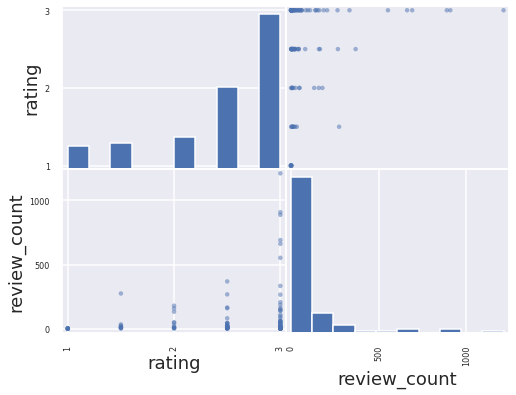

In [12]:
pd.plotting.scatter_matrix(df_under3, figsize = (8, 6))

Most reviews are of an average score. There are only a few much below average (1-2).

In [13]:
df_over3 = df.loc[df['rating'] >= 3]
print(df_over3.head())

                name                                       address zipcode  \
0        Balboa Park             1549 El Prado San Diego, CA 92101   92101   
1        Civita Park          7960 Civita Blvd San Diego, CA 92108   92108   
2    Waterfront Park          1600 Pacific Hwy San Diego, CA 92101   92101   
3  Trolley Barn Park  Adams Ave And Florida St San Diego, CA 92116   92116   
4      Bay View Park                 413 1st St Coronado, CA 92118   92118   

   rating  review_count  
0     5.0          2105  
1     4.5            46  
2     4.5           242  
3     4.5           102  
4     5.0            42  


In [14]:
#dropping rows with Mexico in address
df_over3.drop(df_over3[df_over3['zipcode'] == 'exico'].index, inplace = True) 

In [15]:
df_over3.sort_values(by='rating', ascending=True)

,name,address,zipcode,rating,review_count
389,Diplomat,"6621 Montezuma Rd San Diego, CA 92115",92115,3.0,8
700,Pack & Park,"12675 Sunset Dr Escondido, CA 92025",92025,3.0,1
701,AVA Pacific Beach,"3883 Ingraham St San Diego, CA 92109",92109,3.0,266
171,Presidio Hills Golf Course,"4136 Wallace St San Diego, CA 92110",92110,3.0,29
210,Serra Mesa Recreation Center,"9020 Village Glen Dr San Diego, CA 92123",92123,3.0,7
...,...,...,...,...,...
543,Guadalupana Memorial Chapel,"2601 Imperial Ave San Diego, CA 92102",92102,5.0,1
547,Keiller Leadership Academy,"7270 Lisbon St San Diego, CA 92114",92114,5.0,2
549,Brown's Grove,"7245 Calle Cristobal San Diego, CA 92126",92126,5.0,1
680,Medina Moroccan-Baja Kitchen,"2850 El Cajon Blvd Ste 4 San Diego, CA 92104",92104,5.0,187


In [16]:
df_over3['zipcode'].value_counts()

92101    119
92037     41
92104     41
92109     35
92130     30
        ... 
92627      1
91914      1
92039      1
92004      1
91763      1
Name: zipcode, Length: 103, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f893d678610>,
      dtype=object)

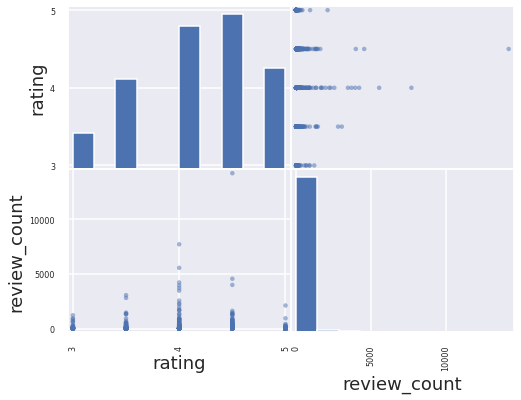

In [17]:
pd.plotting.scatter_matrix(df_over3, figsize = (8, 6))

There is a large amount of reviews of satisfied parks( a lot of 4's and many 5's).

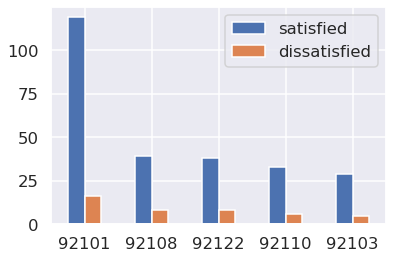

In [19]:
satisfied = [119, 39, 38, 33, 29]
dissatisfied = [16, 8, 8, 6, 5,]
index = ['92101', '92108', '92122',
          '92110', '92103']
df = pd.DataFrame({'satisfied': satisfied,
                    'dissatisfied': dissatisfied}, index=index)
ax = df.plot.bar(rot=0)


Even in the zipcodes with the highest number of dissatifactory parks, there is still a much larger amount of satifactory ones in the same zipcode.

# Ethics & Privacy

The confines of these conclusions did not have any major ethical dilemmas. The links to the actual reviews were taken out when cleaning through the data so that no ones personal Yelp account could be indentified. This analysis showed that even in areas with "bad" parks, there are also many "good" ones: so it would be difficult to create any prejudice towards a certain area.

# Conclusion & Discussion

With the data provided, it can be seen that there is a much larger amount of satisfactory parks in San Diego county than those that aren't. My hypothesis was wrong. I thought that it would be better to place funding into improving existing parks, but the data shows that there is a large amount of "good" ones. Even is someone cosiders a park to be "bad", there is still many "good" ones within their zipcode. With this information, the San Diego County Parks and Recreations Department is completely justified in allocating funding towards the creation of new parks. To make this experiemnt for accurate, it would have been ideal if there were an equal amount of reviews for every park: somes parks had less then 10 reviews while others had thousands. But overall, it seems that the San Diego population is quite happy with their park system.